In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# DATA INSPECTION

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# DATA CLEANING

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier Detection

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

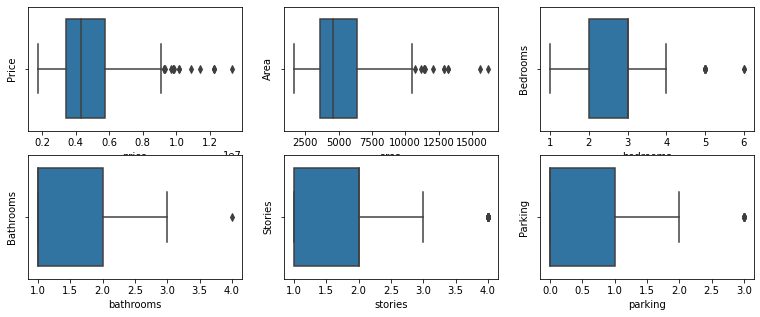

In [8]:
fig, axs = plt.subplots(2, 3, figsize = (13, 5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df['stories'], ax = axs[1,1])
plt6 = sns.boxplot(df['parking'], ax = axs[1,2])
axs[0, 0].set_ylabel('Price')
axs[0, 1].set_ylabel('Area')
axs[0, 2].set_ylabel('Bedrooms')
axs[1, 0].set_ylabel('Bathrooms')
axs[1, 1].set_ylabel('Stories')
axs[1, 2].set_ylabel('Parking')
plt.show()

## price and area have multiple outliers,therefore we drop the outliers

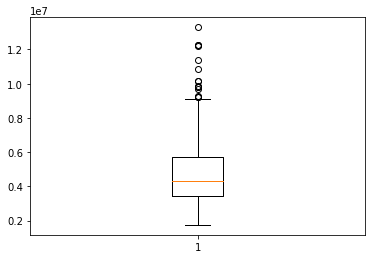

In [9]:

plt.boxplot(df.price)
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
iqr = q3-q1
df = df[(df.price >= q1-1.5*iqr) & (df.price <= q3+1.5*iqr)]

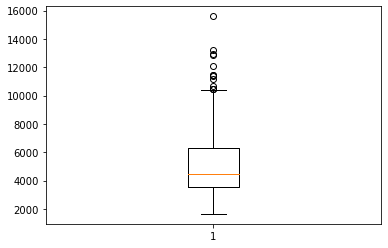

In [10]:
plt.boxplot(df.area)
q1 = df.area.quantile(0.25)
q3 = df.area.quantile(0.75)
iqr = q3-q1
df = df[(df.area >= q1-1.5*iqr) & (df.area <= q3+1.5*iqr)]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

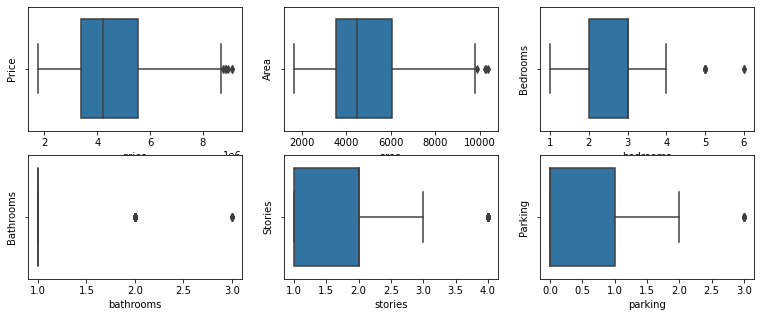

In [11]:
# now we re visualsie the graphs using the frash values that remain after we have removed the outliers
df.reset_index(drop=True, inplace=True)   #resetting the index and dropping out the old values, and creating a new column for the old values
fig, axs = plt.subplots(2, 3, figsize = (13, 5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df['stories'], ax = axs[1,1])
plt6 = sns.boxplot(df['parking'], ax = axs[1,2])
axs[0, 0].set_ylabel('Price')
axs[0, 1].set_ylabel('Area')
axs[0, 2].set_ylabel('Bedrooms')
axs[1, 0].set_ylabel('Bathrooms')
axs[1, 1].set_ylabel('Stories')
axs[1, 2].set_ylabel('Parking')
plt.show()

# EXPLORATORY DATA ANALYSIS

## visualising numeric variables

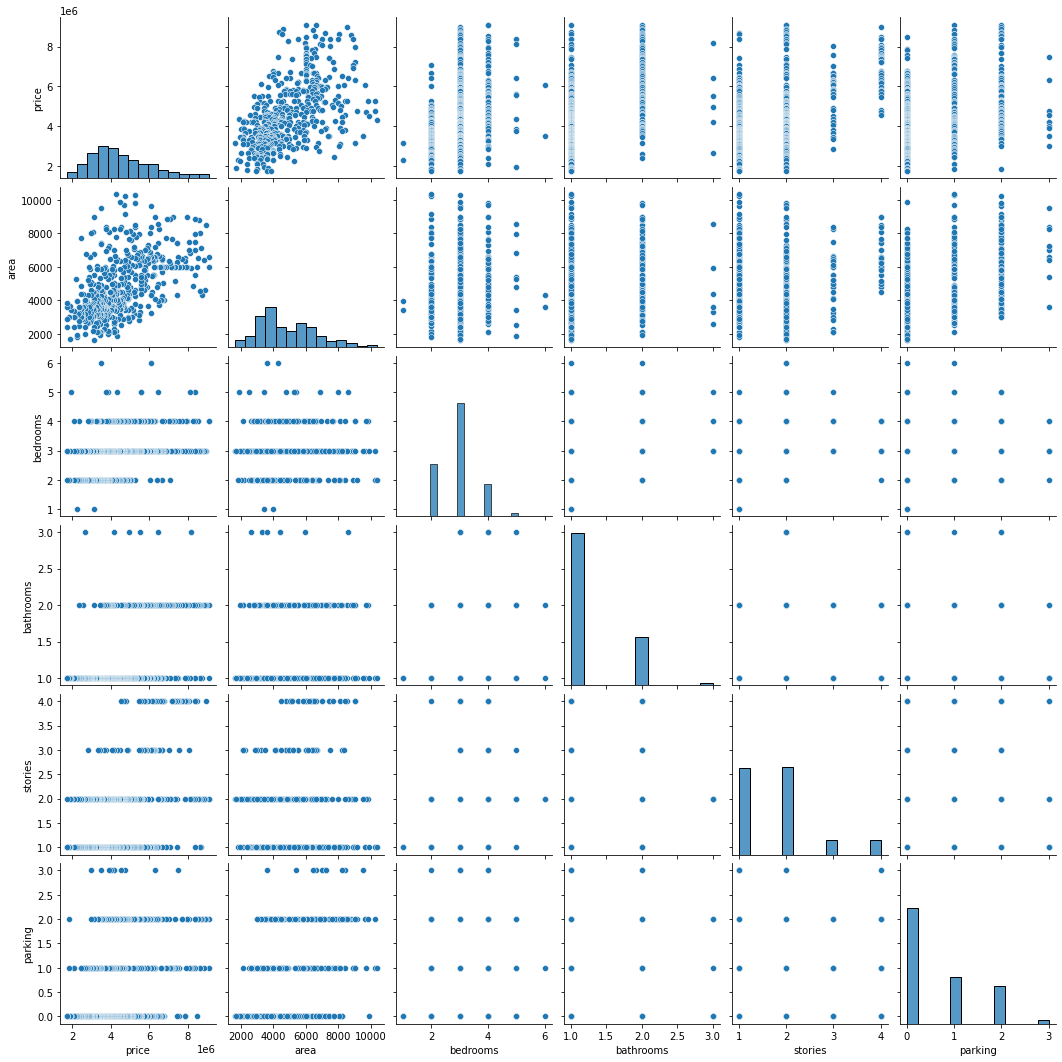

In [12]:
sns.pairplot(df)
plt.show()

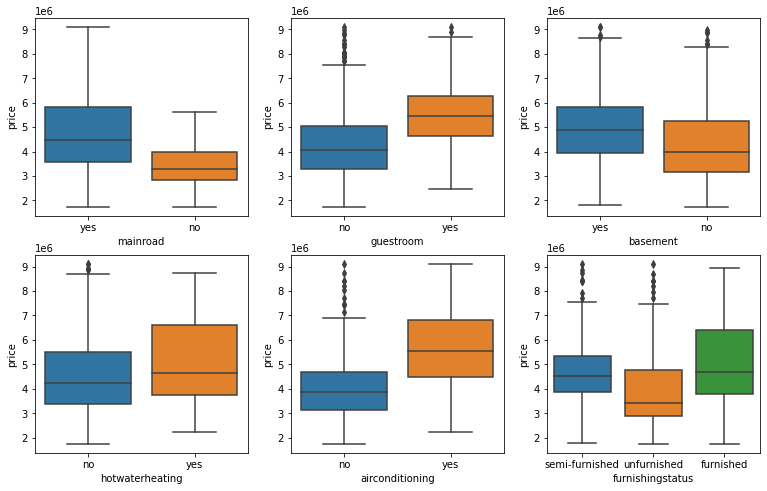

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (13, 8))
plt1 = sns.boxplot(x= df['mainroad'], y= df['price'], ax = axs[0,0])
plt2 = sns.boxplot(x= df['guestroom'], y= df['price'], ax = axs[0,1])
plt3 = sns.boxplot(x= df['basement'], y= df['price'], ax = axs[0,2])
plt4 = sns.boxplot(x= df['hotwaterheating'], y= df['price'], ax = axs[1,0])
plt5 = sns.boxplot(x= df['airconditioning'], y= df['price'], ax = axs[1,1])
plt6 = sns.boxplot(x= df['furnishingstatus'], y= df['price'], ax = axs[1,2])
plt.show()
     


# DATA PREPARATION

In [14]:

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in varlist:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['yes' 'no']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['no' 'yes']
Unique values in prefarea: ['no' 'yes']


In [15]:
# Defining the map function
def binary_map(x):
    return x.map({"yes": 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)


In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [17]:
# for the column furnishing status, we have 3 different variables as the levels, so we can convert them into integers using dummy variables
pd.get_dummies(df['furnishingstatus']).head()
     

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0


In [18]:
# we can drop 'furnished', as the remaining columns will tell us which house if furnished, since no house can fall under more than one category
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)


In [19]:

df = pd.concat([df, status], axis = 1)
df.head()
     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [20]:
# we can delete the columns of furnishing, since we have created dummies for it
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


## SPLITTING INTO TRAINING AND TEST SETS

In [21]:


from sklearn.model_selection import train_test_split
random_seed = np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = random_seed)

In [22]:
# since except area all  other variables have smaller integer values, we must rescale them using min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
# we have applied the scaler to all 'numerical' variables, except the dummy ones
df_train[vars] = scaler.fit_transform(df_train[vars])

In [23]:

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
390,0.219048,0.210060,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,0,1
5,0.952381,0.305753,0.4,0.0,0.333333,1,0,1,1,0,0.666667,0,1,0
141,0.494286,0.554324,0.4,0.5,0.000000,1,1,1,1,0,0.000000,0,0,1
268,0.333333,0.072937,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0,1,0
135,0.504762,0.169215,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0


In [24]:


df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.385031,0.366529,0.397230,0.137119,0.280702,0.858726,0.174515,0.346260,0.047091,0.304709,0.226223,0.210526,0.407202,0.335180
std,0.213596,0.200374,0.147923,0.238413,0.292921,0.348788,0.380079,0.476438,0.212128,0.460923,0.289063,0.408248,0.491995,0.472709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.212394,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.326759,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.519048,0.501809,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


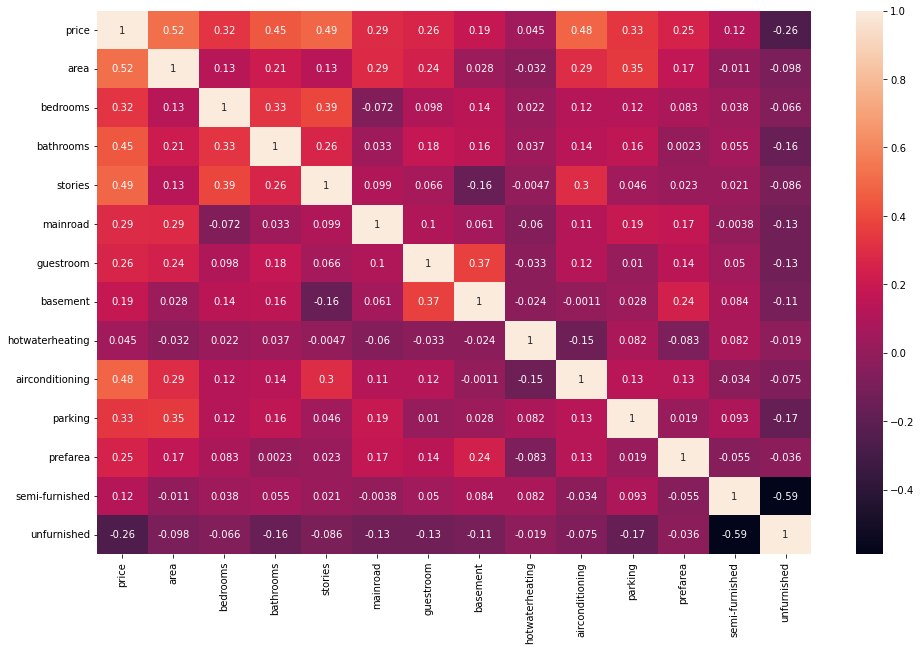

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [26]:

y_train = df_train.pop('price') #the pop returns only the price column of the df_train
x_train = df_train #this returns the remaining df_train

# BUILDING THE MODEL

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
rfe = RFE(estimator = model,n_features_to_select = 6)
#the number of features to be selected are set to 6
rfe = rfe.fit(x_train, y_train)

In [30]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 4),
 ('guestroom', False, 8),
 ('basement', True, 1),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', False, 3),
 ('semi-furnished', False, 7),
 ('unfurnished', False, 5)]

In [31]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'basement', 'airconditioning',
       'parking'],
      dtype='object')

In [32]:

df_test[vars] = scaler.fit_transform(df_test[vars])

In [33]:

y_test = df_test.pop('price')
x_test = df_test
     

In [34]:


import statsmodels.api as sm
x_test = sm.add_constant(x_test)

In [35]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
     

In [36]:
x_test_rfe = x_test[x_train_rfe.columns]

In [37]:
lm = sm.OLS(y_train,x_train_rfe).fit()
     

# MAKING PREDICTIONS

In [38]:
y_pred = lm.predict(x_test_rfe)

In [39]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
     

0.5815585429281164

Text(0, 0.5, 'y_pred')

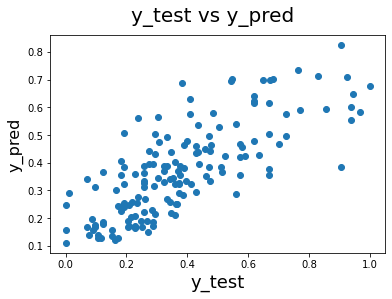

In [40]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)